In [ ]:

!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install sklearn.preprocessing
!pip install pandas
!pip install StandardScaler
!pip install MinMaxScaler
!pip install scikit-learn
!pip install scipy

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


In [4]:
#socialmedia = pd.read_csv(r"C:\Users\scsoto\Documents\Analitica de Datos\social_media_vs_productivity.csv")
iajobs = pd.read_csv(r"C:\Users\scsoto\Documents\Analitica de Datos\diversified_job_postings.csv")
iajobs.head(10)
#socialmedia.info()
#socialmedia.describe(include="all")

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,48140,USD,EN,Full-time,China,L,China,100,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.6,Smart Analytics
1,AI00002,AI Software Engineer,48260,USD,EN,Full-time,Canada,S,Ireland,0,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,7.7,TechCorp Inc
2,AI00003,AI Specialist,56983,USD,MI,Full-time,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,5.6,Autonomous Tech
3,AI00004,NLP Engineer,40985,USD,EN,Freelance,India,S,India,100,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,4.4,Future Systems
4,AI00005,AI Consultant,89894,EUR,MI,Contract,France,S,Singapore,0,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,5.6,Advanced Robotics
5,AI00006,AI Architect,81278,EUR,MI,Full-time,Germany,M,Germany,0,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,6.8,Neural Networks Co
6,AI00007,Principal Data Scientist,40825,GBP,EN,Freelance,United Kingdom,S,United Kingdom,50,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,10.0,DataVision Ltd
7,AI00008,NLP Engineer,32639,EUR,EN,Full-time,France,M,France,50,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.1,Cloud AI Solutions
8,AI00009,Data Analyst,111713,USD,SE,Full-time,Singapore,S,Singapore,50,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.8,Quantum Computing Inc
9,AI00010,AI Software Engineer,38949,USD,EN,Full-time,Austria,S,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,4.3,Cloud AI Solutions


In [5]:
iajobs['experience_level']=iajobs['experience_level'].str.strip().replace({"SE":"Expert","MI":"Intermediate","EN":"Junior","EX":"Director"})
iajobs['experience_level'].value_counts()
#iajobs = iajobs.drop('job_description_length', axis=1)
#iajobs.columns


experience_level
Junior          7359
Intermediate    4570
Expert          2323
Director         748
Name: count, dtype: int64

In [6]:
iajobs['employment_type']=iajobs['employment_type'].str.strip().replace({"PT":"Part-time","FT":"Full-time","CT":"Contract","FL":"Freelance"})
iajobs['employment_type'].value_counts()


employment_type
Full-time    9083
Freelance    2882
Contract     2276
Part-time     759
Name: count, dtype: int64

In [7]:
iajobs['company_size']=iajobs['company_size'].str.strip().replace({"S":"Small","M":"Medium","L":"Large"})
iajobs['company_size'].value_counts()


company_size
Small     5946
Medium    5311
Large     3743
Name: count, dtype: int64

In [8]:
# Agrupamos por company name y sacamos la media de los salarios y des score de los beneficios
df_grouped = iajobs.groupby("experience_level")[["salary_usd","benefits_score"]].mean().round(2)
print(df_grouped.to_string(float_format='{:,.2f}'.format))
#df_grouped

                  salary_usd  benefits_score
experience_level                            
Director          168,902.30            6.52
Expert            114,911.78            6.44
Intermediate       70,202.21            6.48
Junior             37,473.64            6.47


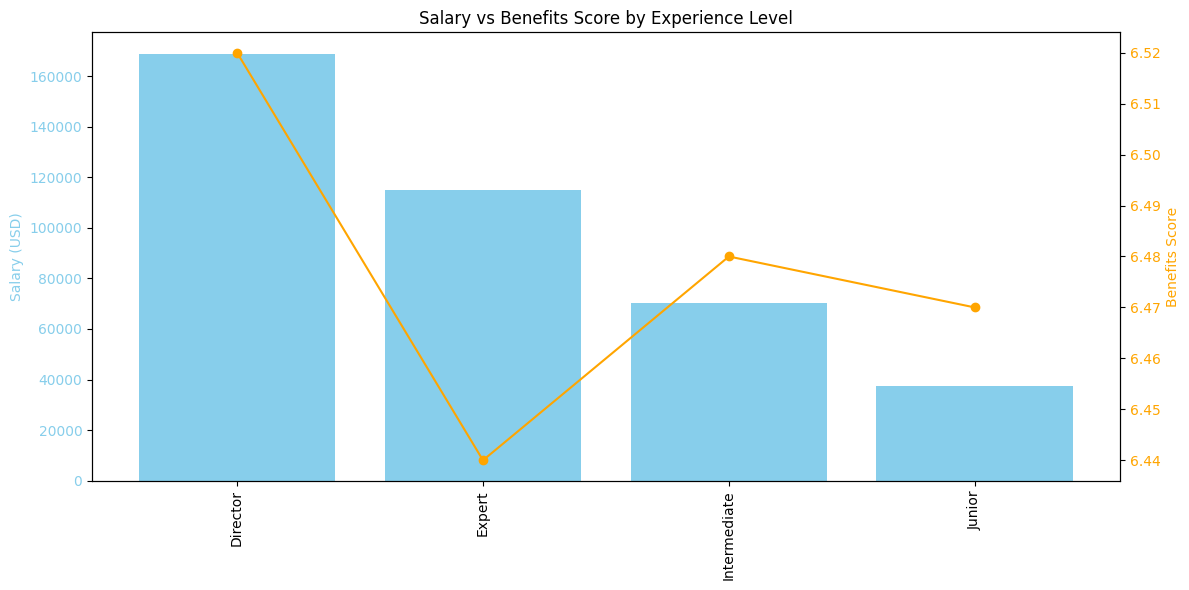

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje Y1: salarios
ax1.bar(df_grouped.index, df_grouped['salary_usd'], color='skyblue', label='Salary USD')
ax1.set_ylabel('Salary (USD)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=90)

# Eje Y2: benefits_score
ax2 = ax1.twinx()
ax2.plot(df_grouped.index, df_grouped['benefits_score'], color='orange', marker='o', label='Benefits Score')
ax2.set_ylabel('Benefits Score', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Salary vs Benefits Score by Experience Level')
plt.tight_layout()
plt.show()


In [11]:
df_grouped = iajobs.groupby(["job_title","company_name"])[["salary_usd", "benefits_score"]].mean()
print(df_grouped.to_string(float_format='{:,.2f}'.format))

                                                        salary_usd  benefits_score
job_title                   company_name                                          
AI Architect                AI Innovations               72,296.33            6.39
                            Advanced Robotics            73,543.77            6.10
                            Algorithmic Solutions        64,159.07            6.68
                            Autonomous Tech              70,974.50            6.13
                            Cloud AI Solutions           62,994.98            6.18
                            Cognitive Computing          61,401.40            6.26
                            DataVision Ltd               74,964.38            6.34
                            DeepTech Ventures            76,114.22            6.22
                            Digital Transformation LLC   61,892.51            6.48
                            Future Systems               73,833.02            6.87
    

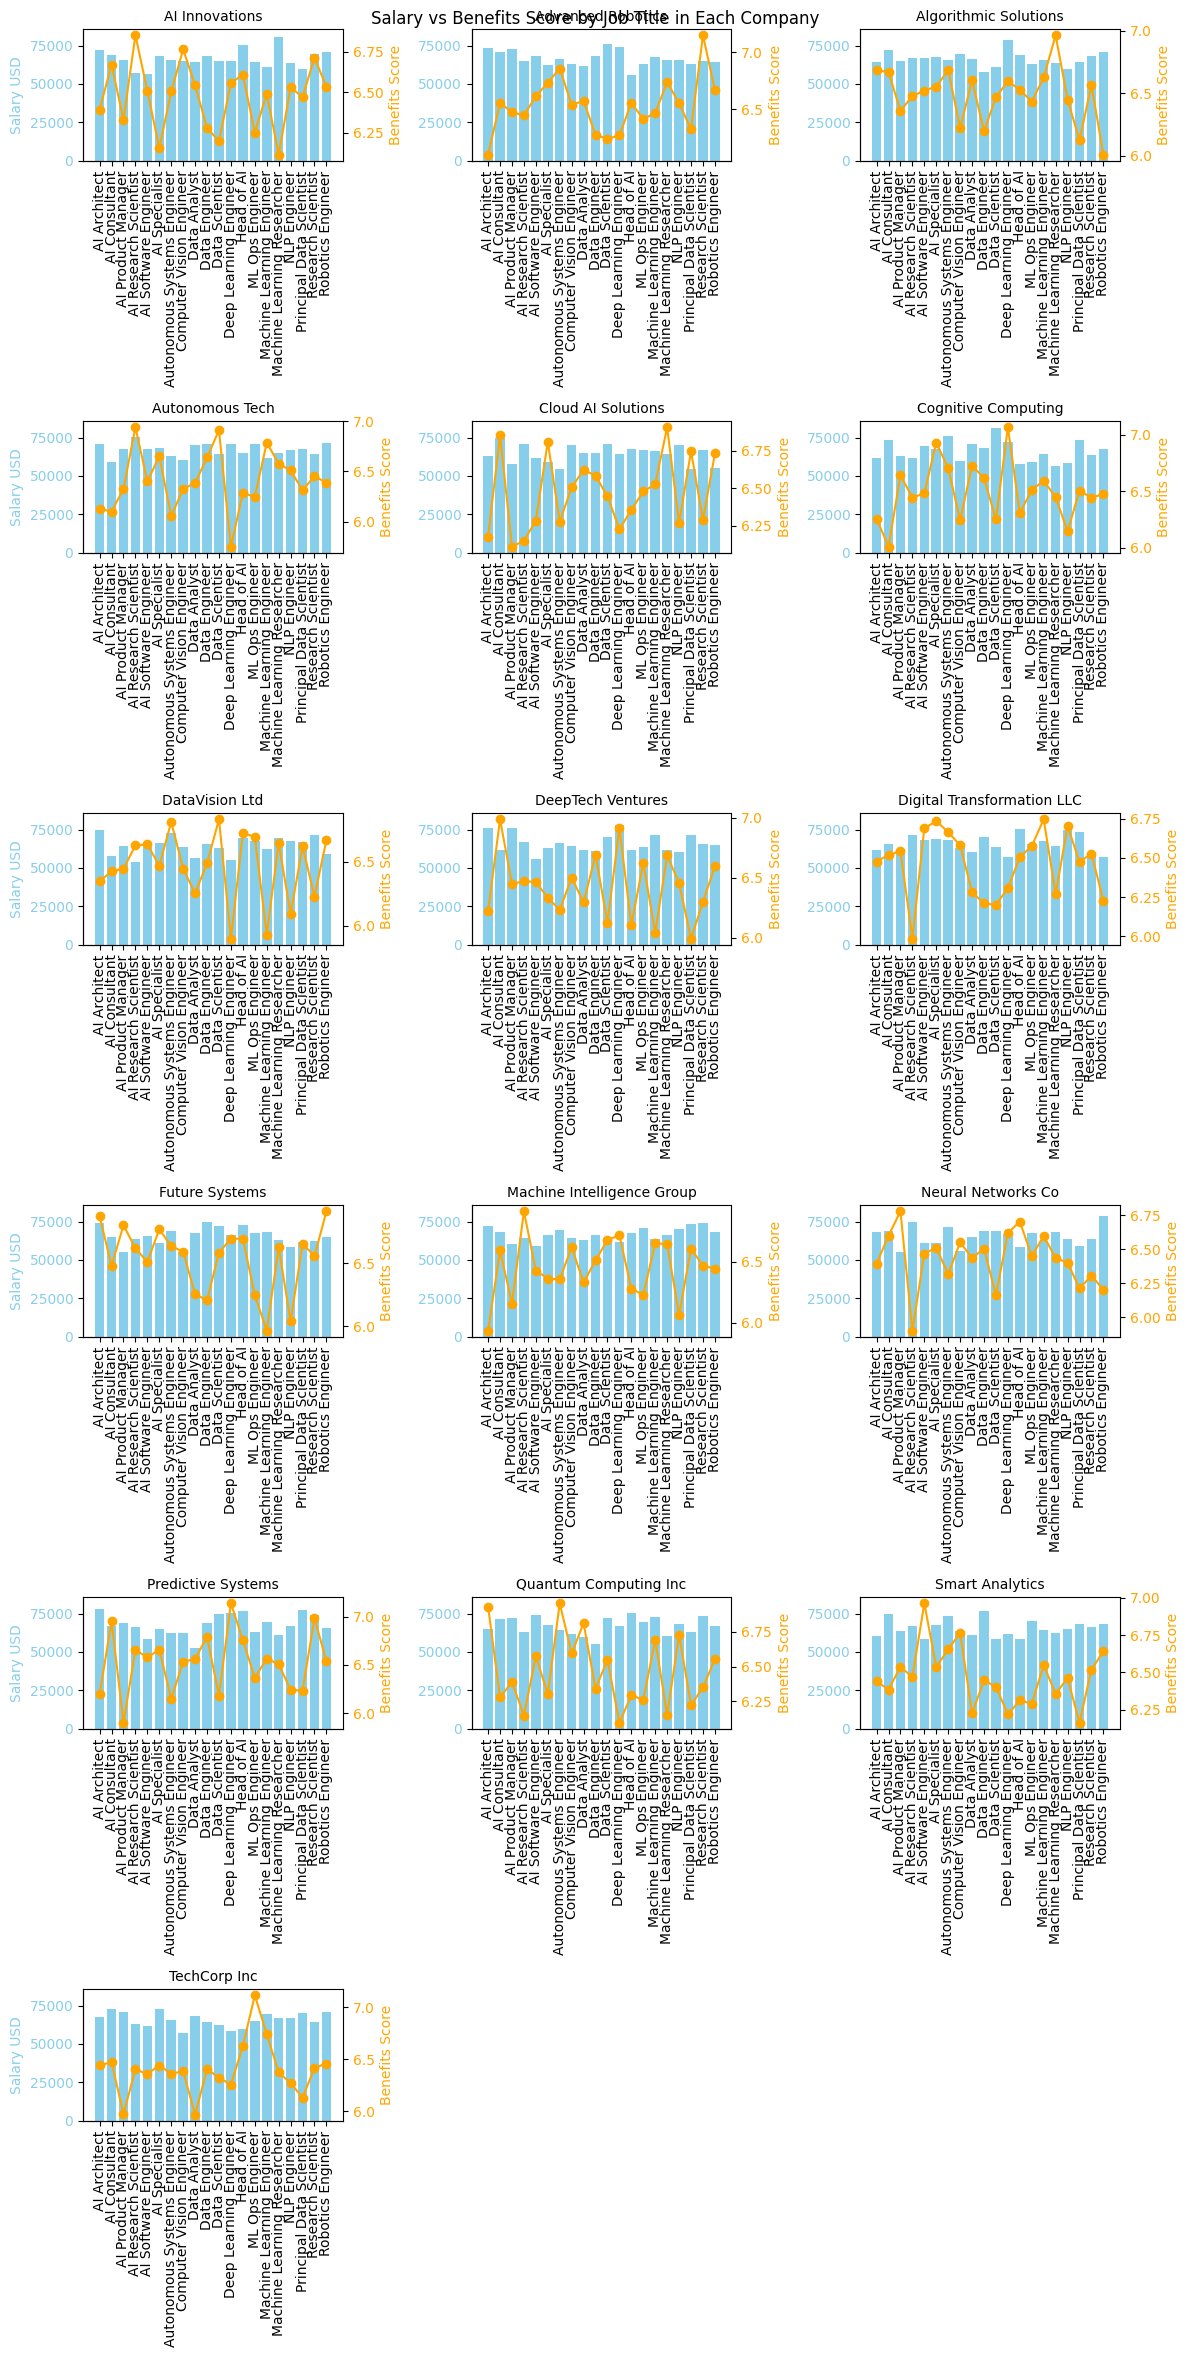

In [12]:
# Datos base
df = df_grouped.reset_index()

# Crear grid
g = sns.FacetGrid(df, col="company_name", col_wrap=3, height=4, sharex=False)

# Función personalizada que dibuja barra + línea
def dual_axis_plot(data, color, **kwargs):
    ax = plt.gca()

    # Barras: salario
    ax.bar(data['job_title'], data['salary_usd'], color='skyblue')
    ax.set_ylabel('Salary USD', color='skyblue')
    ax.tick_params(axis='y', labelcolor='skyblue')
    ax.tick_params(axis='x', rotation=90)

    # Eje secundario: benefits
    ax2 = ax.twinx()
    ax2.plot(data['job_title'], data['benefits_score'], color='orange', marker='o')
    ax2.set_ylabel('Benefits Score', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

# Aplicar la función a cada panel
g.map_dataframe(dual_axis_plot)

# Títulos y espaciado
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Salary vs Benefits Score by Job Title in Each Company")
plt.tight_layout()
plt.show()

In [17]:
iajobs.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [13]:
#Validar las habilidades mas solicitadas en los diferentes trabajos
# 1. Separar los skills individuales
all_skills = iajobs['required_skills'].dropna().str.split(', ')

# 2. Aplanar la lista de listas
flat_skills = [skill.strip() for sublist in all_skills for skill in sublist]

# 3. Contar la frecuencia de cada skill
from collections import Counter
skill_counts = Counter(flat_skills)

# 4. Convertir a DataFrame para visualizar
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=['skill', 'count']).sort_values(by='count', ascending=False)

print(skill_counts_df)

                 skill  count
8               Python   4450
13                 SQL   3407
21          TensorFlow   3022
2           Kubernetes   3009
12               Scala   2794
1              PyTorch   2777
3                Linux   2705
19                 Git   2631
10                Java   2578
20                 GCP   2442
11              Hadoop   2419
0              Tableau   2341
16                   R   2311
17     Computer Vision   2284
15  Data Visualization   2270
5        Deep Learning   2189
14               MLOps   2164
23               Spark   2155
4                  NLP   2145
18               Azure   2144
6                  AWS   2018
7          Mathematics   1943
9               Docker   1862
22          Statistics   1833


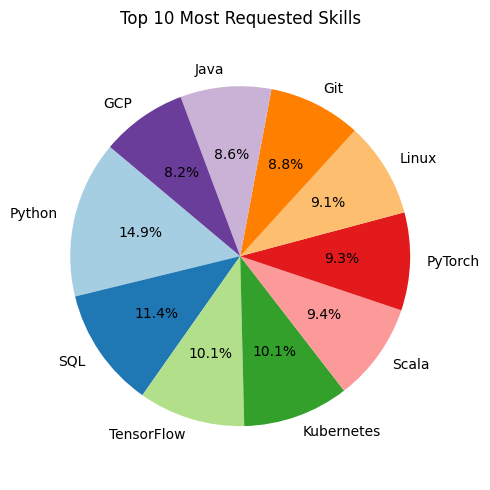

In [14]:
top_skills = skill_counts_df.head(10)  

plt.figure(figsize=(5, 5))
plt.pie(
    top_skills['count'],
    labels=top_skills['skill'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Top 10 Most Requested Skills')
plt.axis('equal')  # para que sea un círculo perfecto
plt.tight_layout()
plt.show()

In [18]:
def detectar_outliers(col):
    Q1=iajobs[col].quantile(0.25)
    Q3=iajobs[col].quantile(0.75)
    IQR=Q3-Q1
    outliers=iajobs[(iajobs[col]<Q1-1.5 * IQR)| (iajobs[col]>Q3+1.5 * IQR) ]
    return outliers

#outliers_estatura=detectar_outliers("talla_de_zapato_(cm)")

In [19]:
#variables_numericas=['edad','peso_(kg)','estatura_(cm)','talla_de_zapato_(cm)']
for i in iajobs:
    if iajobs[i].dtypes in ['int64','float64']:
       outliers=detectar_outliers(i)
       print(f"*************outliers de la columna {i}*************")
       print(outliers)
       print("\n")
    

*************outliers de la columna salary_usd*************
        job_id                    job_title  salary_usd salary_currency  \
21     AI00022  Autonomous Systems Engineer      183825             USD   
46     AI00047        AI Research Scientist      178934             USD   
172    AI00173                AI Specialist      175319             GBP   
185    AI00186       Deep Learning Engineer      172997             USD   
190    AI00191                Data Engineer      157648             USD   
...        ...                          ...         ...             ...   
14736  AI14737         AI Software Engineer      193201             USD   
14773  AI14774                 Data Analyst      166140             USD   
14782  AI14783                AI Specialist      161255             EUR   
14884  AI14885                 AI Architect      168943             USD   
14950  AI14951  Machine Learning Researcher      181584             USD   

      experience_level employment_type 

['salary_usd', 'remote_ratio', 'years_experience', 'job_description_length', 'benefits_score']


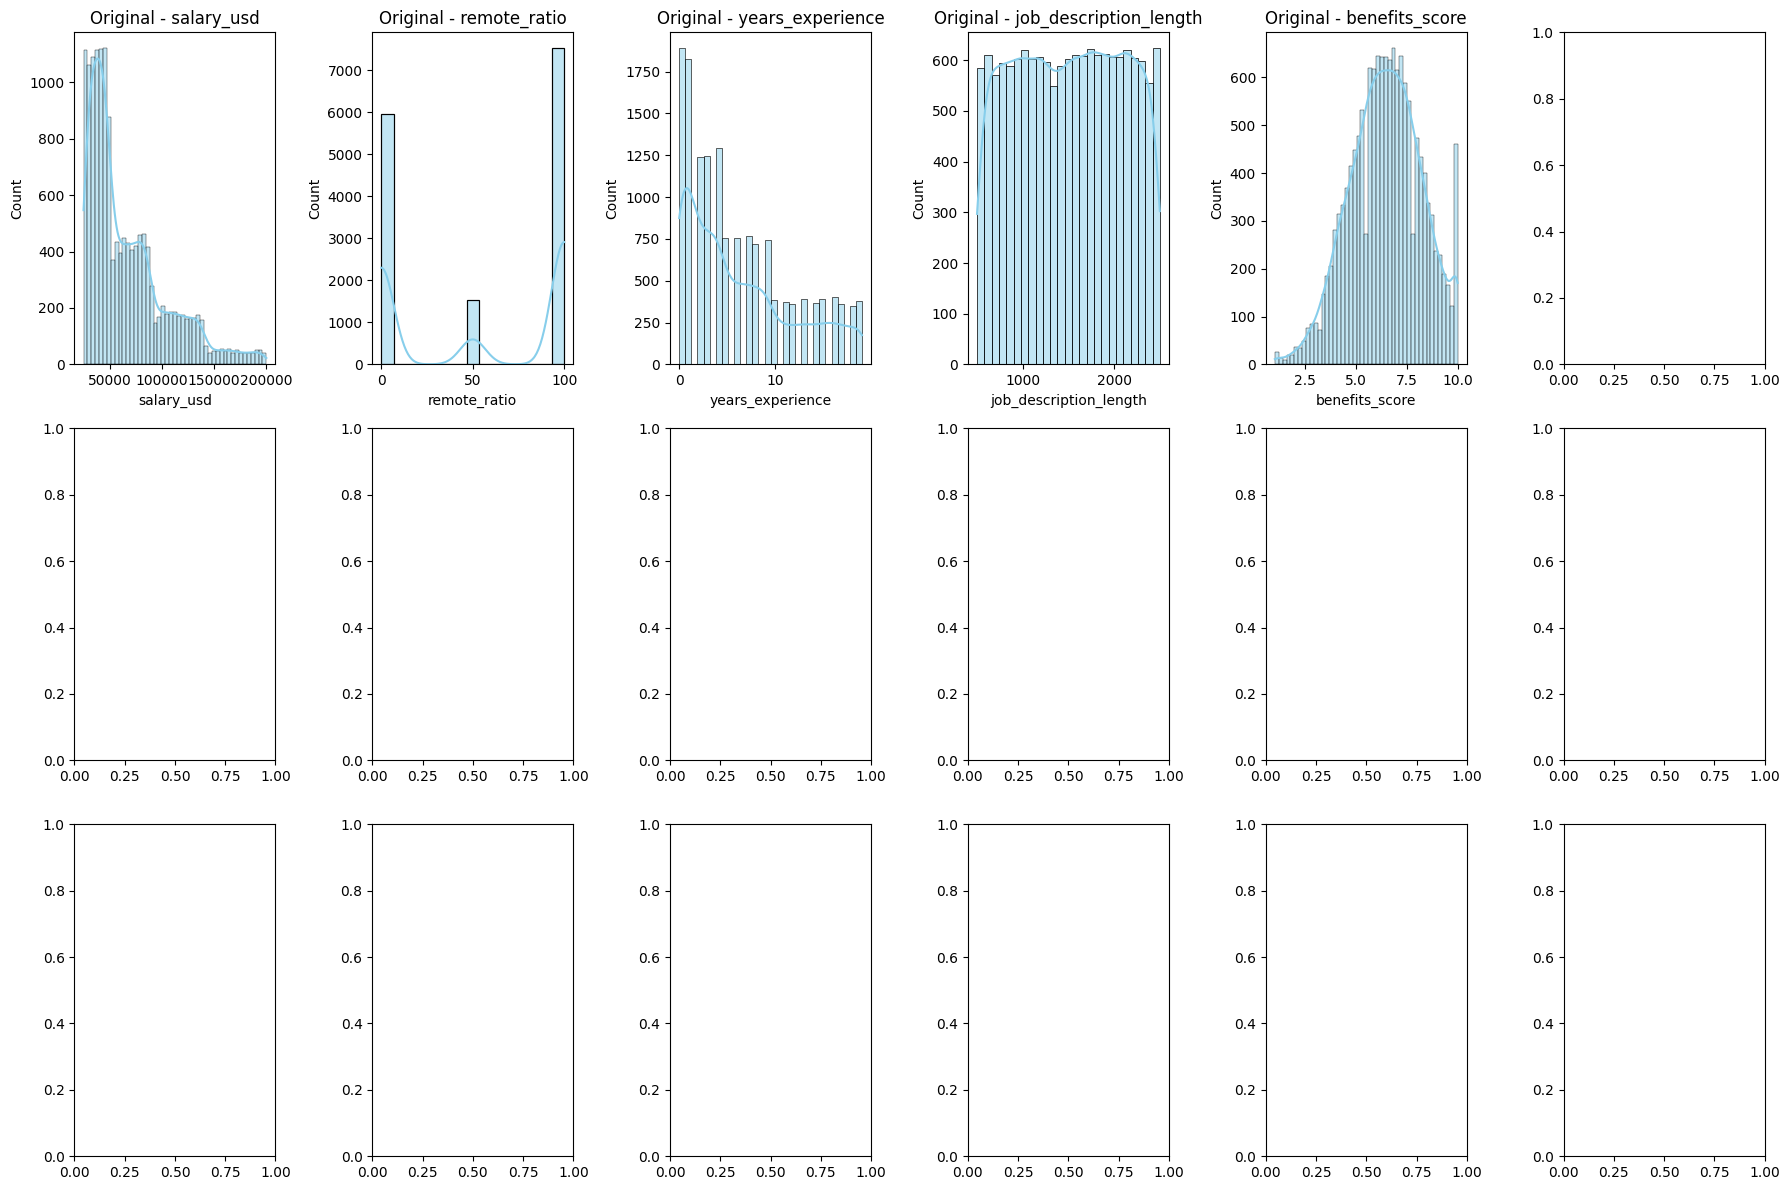

In [16]:
# Gráficas
columnas_numericas = iajobs.select_dtypes(include=['int64', 'float64']).columns.tolist()
df_numerico=iajobs[columnas_numericas]

fig, axs=plt.subplots(3,6,figsize=(18,12))
print(columnas_numericas)
for i, col in enumerate(columnas_numericas):
    sns.histplot(df_numerico[col],kde=True, ax=axs[0,i],color='skyblue')
    axs[0,i].set_title(f"Original - {col}")

plt.tight_layout()
plt.show()    